## Calculation
Wealth factor is defined as: 
<br>

$ 
\large  
wealth\_factor\_for\_field = \frac{cost\_of\_living\_in\_country\_in\_dolars}{income\_in\_field\_in\_dolars} 
$
Meaning of results:
* if $ wealth\_factor\_for\_field < 1 $ live standard is lower than defined by cost of living formula
* if $ wealth\_factor\_for\_field \ge 1 $ live standard is greater or equal than defined by cost of living formula

In [1]:
from pandas import read_csv

filename = 'dataset/cost_of_living.csv'
cost_of_living = read_csv(filename,index_col="Country").drop("2020",axis=1)
cost_of_living.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Argentina,1287.8540,1567.5980,1938.3650,1855.1085,2003.9330,2250.2455,2134.153345,2162.854675,1845.922275,1547.585985
Australia,2305.9525,3402.0115,3497.3400,3606.2805,3505.2375,3031.5370,3015.473135,3013.260195,3118.820875,3015.915325
Austria,2098.4985,2771.5665,2395.3730,2461.0660,2535.7345,2414.0015,2746.560665,2763.594395,2892.079440,2807.800890
Belgium,2467.6735,3089.2735,2618.6360,2795.8555,3031.6935,2755.3645,2950.407795,2784.550510,3012.334075,2876.052530
Bosnia And Herzegovina,1201.1620,1351.2165,1291.5925,1345.5085,1383.9850,1215.0130,1374.416230,1362.515830,1452.223765,1488.702065


In [2]:
from pandas import read_csv
filename = 'dataset//earnings_split.csv'
df_incomes = read_csv(filename,index_col=["Country","Field"])
df_incomes.head()

2010    2011  \
Country Field                                                                
Armenia A. Agriculture; forestry and fishing                188.86  188.18   
        B. Mining and quarrying                             580.43  638.04   
        C. Manufacturing                                    268.97  272.61   
        D. Electricity; gas, steam and air conditioning...  400.84  408.57   
        E. Water supply; sewerage, waste management and...  268.06  301.18   

                                                              2012    2013  \
Country Field                                                                
Armenia A. Agriculture; forestry and fishing                208.17  224.69   
        B. Mining and quarrying                             642.48  773.98   
        C. Manufacturing                                    276.22  332.28   
        D. Electricity; gas, steam and air conditioning...  383.22  472.16   
        E. Water supply; sewerage, waste management and...  276.06  340.92   

                                                              2014    2015  \
Country Field                                                                
Armenia A. Agriculture; forestry and fishing                240.18  180.14   
        B. Mining and quarrying                             795.76  353.03   
        C. Manufacturing                                    343.75  212.04   
        D. Electricity; gas, steam and air conditioning...  541.54  244.74   
        E. Water supply; sewerage, waste management and...  368.02  185.43   

                                                              2016    2017  \
Country Field                                                                
Armenia A. Agriculture; forestry and fishing                159.63  195.87   
        B. Mining and quarrying                             322.89  348.52   
        C. Manufacturing                                    215.81  220.56   
        D. Electricity; gas, steam and air conditioning...  235.88  267.28   
        E. Water supply; sewerage, waste management and...  174.76  210.34   

                                                              2018    2019  
Country Field                                                               
Armenia A. Agriculture; forestry and fishing                192.78  210.22  
        B. Mining and quarrying                             384.98  430.47  
        C. Manufacturing                                    219.63  235.63  
        D. Electricity; gas, steam and air conditioning...  233.56  265.93  
        E. Water supply; sewerage, waste management and...  207.37  213.12

In [3]:
cost_of_living_and_incomes = cost_of_living.join(df_incomes, how='inner',lsuffix='_x',rsuffix='_y')
cost_of_living_and_incomes.head()

2010_x  \
Country Field                                                           
Austria B. Mining and quarrying                             2098.4985   
        C. Manufacturing                                    2098.4985   
        D. Electricity; gas, steam and air conditioning...  2098.4985   
        E. Water supply; sewerage, waste management and...  2098.4985   
        F. Construction                                     2098.4985   

                                                               2011_x  \
Country Field                                                           
Austria B. Mining and quarrying                             2771.5665   
        C. Manufacturing                                    2771.5665   
        D. Electricity; gas, steam and air conditioning...  2771.5665   
        E. Water supply; sewerage, waste management and...  2771.5665   
        F. Construction                                     2771.5665   

                                                              2012_x  \
Country Field                                                          
Austria B. Mining and quarrying                             2395.373   
        C. Manufacturing                                    2395.373   
        D. Electricity; gas, steam and air conditioning...  2395.373   
        E. Water supply; sewerage, waste management and...  2395.373   
        F. Construction                                     2395.373   

                                                              2013_x  \
Country Field                                                          
Austria B. Mining and quarrying                             2461.066   
        C. Manufacturing                                    2461.066   
        D. Electricity; gas, steam and air conditioning...  2461.066   
        E. Water supply; sewerage, waste management and...  2461.066   
        F. Construction                                     2461.066   

                                                               2014_x  \
Country Field                                                           
Austria B. Mining and quarrying                             2535.7345   
        C. Manufacturing                                    2535.7345   
        D. Electricity; gas, steam and air conditioning...  2535.7345   
        E. Water supply; sewerage, waste management and...  2535.7345   
        F. Construction                                     2535.7345   

                                                               2015_x  \
Country Field                                                           
Austria B. Mining and quarrying                             2414.0015   
        C. Manufacturing                                    2414.0015   
        D. Electricity; gas, steam and air conditioning...  2414.0015   
        E. Water supply; sewerage, waste management and...  2414.0015   
        F. Construction                                     2414.0015   

                                                                 2016_x  \
Country Field                                                             
Austria B. Mining and quarrying                             2746.560665   
        C. Manufacturing                                    2746.560665   
        D. Electricity; gas, steam and air conditioning...  2746.560665   
        E. Water supply; sewerage, waste management and...  2746.560665   
        F. Construction                                     2746.560665   

                                                                 2017_x  \
Country Field                                                             
Austria B. Mining and quarrying                             2763.594395   
        C. Manufacturing                                    2763.594395   
        D. Electricity; gas, steam and air conditioning...  2763.594395   
        E. Water supply; sewerage, waste management and...  2763.594395   
        F. Construction      

In [4]:
for x in range(2010,2020):
    cost_of_living_and_incomes[str(x)] = cost_of_living_and_incomes[str(x)+"_y"]/cost_of_living_and_incomes[str(x)+"_x"]
    del cost_of_living_and_incomes[str(x)+"_x"]
    del cost_of_living_and_incomes[str(x)+"_y"]
wealth_factor = cost_of_living_and_incomes    
wealth_factor.head()

2010  \
Country Field                                                          
Austria B. Mining and quarrying                             1.955250   
        C. Manufacturing                                    1.741093   
        D. Electricity; gas, steam and air conditioning...  2.522561   
        E. Water supply; sewerage, waste management and...  1.533878   
        F. Construction                                     1.540196   

                                                                2011  \
Country Field                                                          
Austria B. Mining and quarrying                             1.778384   
        C. Manufacturing                                    1.516222   
        D. Electricity; gas, steam and air conditioning...  2.282622   
        E. Water supply; sewerage, waste management and...  1.238992   
        F. Construction                                     1.165168   

                                                                2012  \
Country Field                                                          
Austria B. Mining and quarrying                             1.967915   
        C. Manufacturing                                    1.670233   
        D. Electricity; gas, steam and air conditioning...  2.552550   
        E. Water supply; sewerage, waste management and...  1.365044   
        F. Construction                                     1.268500   

                                                                2013  \
Country Field                                                          
Austria B. Mining and quarrying                             2.014517   
        C. Manufacturing                                    1.735520   
        D. Electricity; gas, steam and air conditioning...  2.595184   
        E. Water supply; sewerage, waste management and...  1.413347   
        F. Construction                                     1.289226   

                                                                2014  \
Country Field                                                          
Austria B. Mining and quarrying                             1.840500   
        C. Manufacturing                                    1.602644   
        D. Electricity; gas, steam and air conditioning...  2.240771   
        E. Water supply; sewerage, waste management and...  1.452806   
        F. Construction                                     1.466427   

                                                                2015  \
Country Field                                                          
Austria B. Mining and quarrying                             1.792961   
        C. Manufacturing                                    1.531441   
        D. Electricity; gas, steam and air conditioning...  2.274178   
        E. Water supply; sewerage, waste management and...  1.248317   
        F. Construction                                     1.146739   

                                                                2016  \
Country Field                                                          
Austria B. Mining and quarrying                             1.566115   
        C. Manufacturing                                    1.372666   
        D. Electricity; gas, steam and air conditioning...  2.046909   
        E. Water supply; sewerage, waste management and...  1.116753   
        F. Construction                                     1.027285   

                                                                2017  \
Country Field                                                          
Austria B. Mining and quarrying                             1.756086   
        C. Manufacturing                                    1.415580   
        D. Electricity; gas, steam and air conditioning...  2.092098   
        E. Water supply; sewerage, waste management and...  1.153147   
        F. Construction                                     1.064035   

                        

In [5]:
wealth_factor.to_csv("dataset//wealth_factor.csv")

## Analysis

### Total analysis

In [6]:
df_wealth_factor_total = wealth_factor[wealth_factor.index.map(lambda x: x[1]=="Total")].reset_index(level=1,drop=True)
df_wealth_factor_total.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Austria,1.610318,1.214385,1.328570,1.356144,1.470095,1.194539,1.066377,1.099188,1.130287,1.135102
Canada,1.633002,1.404459,1.412510,1.344408,1.330145,1.200633,1.181062,1.288202,1.205984,1.236199
Colombia,0.302107,0.326338,0.323344,0.359604,0.350767,0.289227,0.286670,0.301525,0.306490,0.320278
Germany,2.047452,2.022286,2.099457,2.017790,1.537727,1.808020,1.727878,1.777219,1.820677,1.818674
Ecuador,0.309987,0.346973,0.348286,0.351477,0.389123,0.315953,0.301856,0.308432,0.310075,0.323835


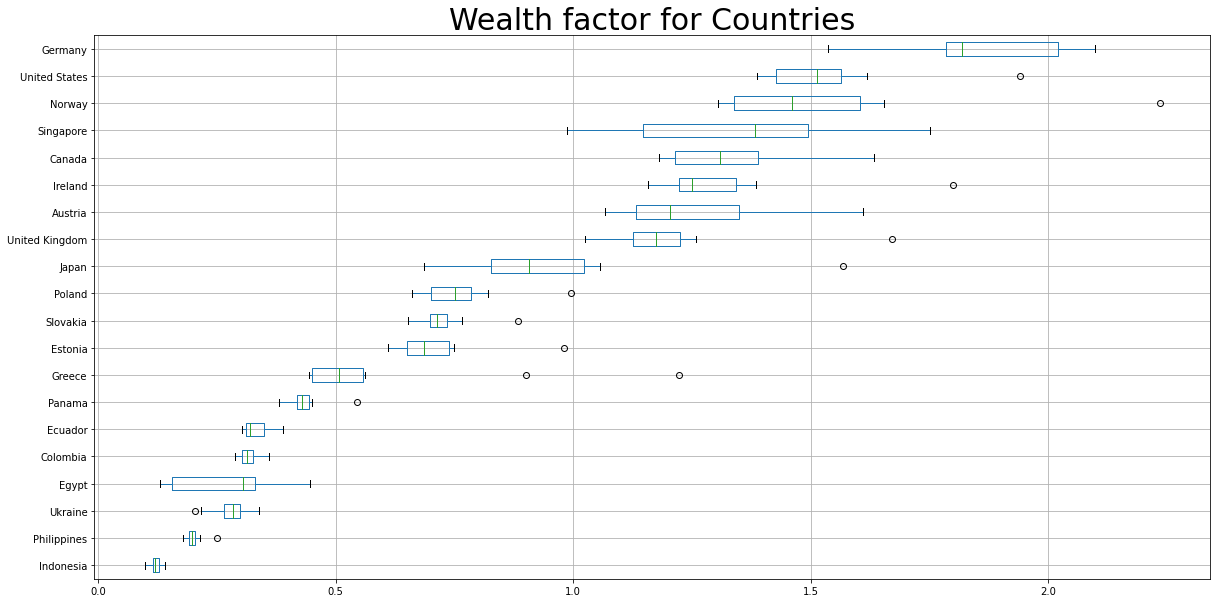

In [7]:
import matplotlib.pyplot as plt
sort_by_mean = df_wealth_factor_total.median(axis=1).sort_values()
fig, ax = plt.subplots(figsize=(20,df_wealth_factor_total.shape[0]//2))
df_wealth_factor_total.reindex(sort_by_mean.index, axis=0).T.boxplot(vert=False,ax=ax)
plt.title("Wealth factor for Countries",fontsize=30)
pass

### Fields analysis

#### By fields

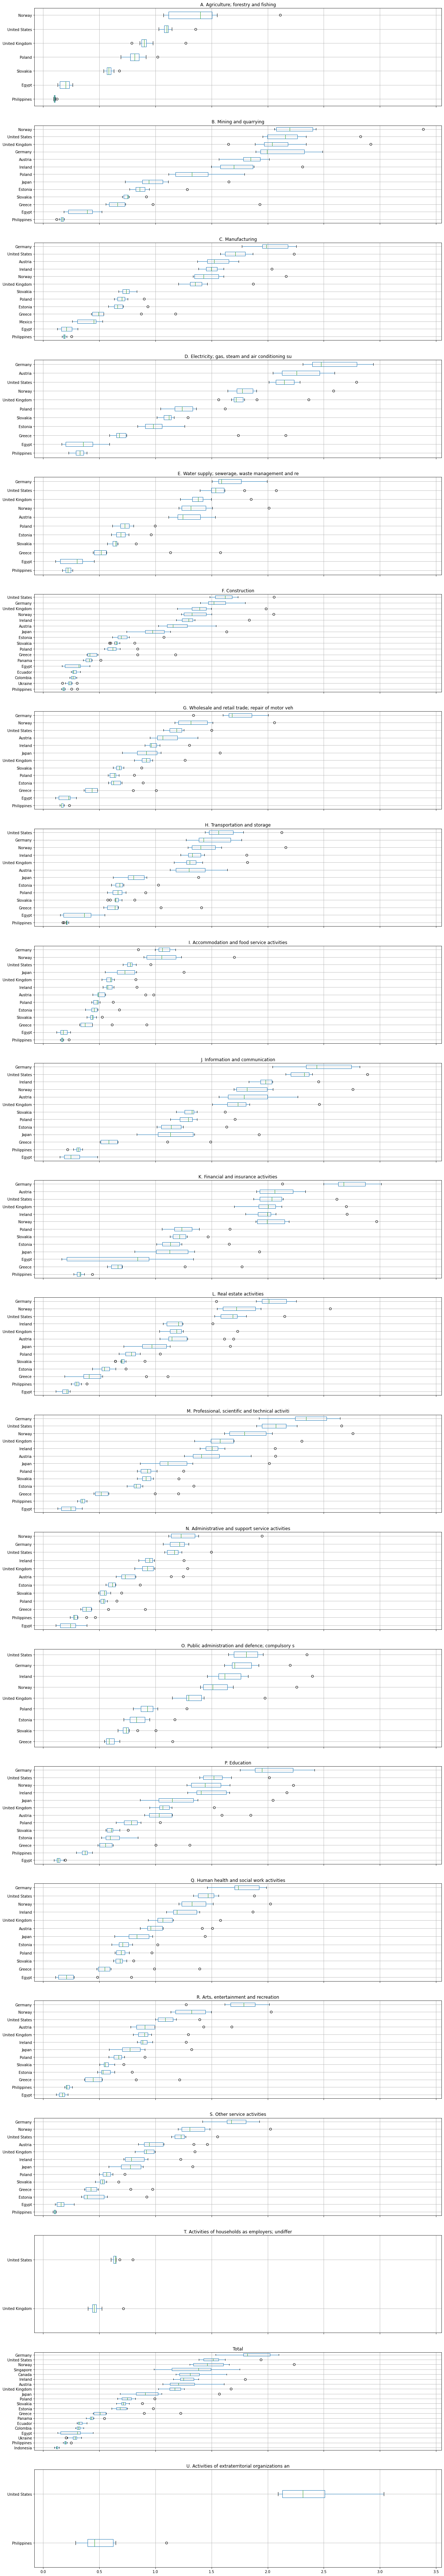

In [13]:
grouped = wealth_factor.groupby(level=1)

nrows = grouped.ngroups

fig, axes = plt.subplots(nrows, figsize=(20,wealth_factor.shape[0]//2),sharex=True)

for (key, ax) in zip(grouped.groups.keys(), axes):
    data = grouped.get_group(key).reset_index(level=1,drop=True)
    sort_by_mean = data.median(axis=1).sort_values()
    ax.title.set_text(key)
    data.reindex(sort_by_mean.index, axis=0).T.boxplot(vert=False,ax=ax)

plt.show()

#### Shorten fields names

In [9]:
wealth_factor.index.set_levels(
    wealth_factor.index.levels[1].str[:50], 
    level=1,
    inplace=True,  # If False, you will need to use `df.index = ...`
)

<ipython-input-9-1384cb2194ee>:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  wealth_factor.index.set_levels(


#### By country

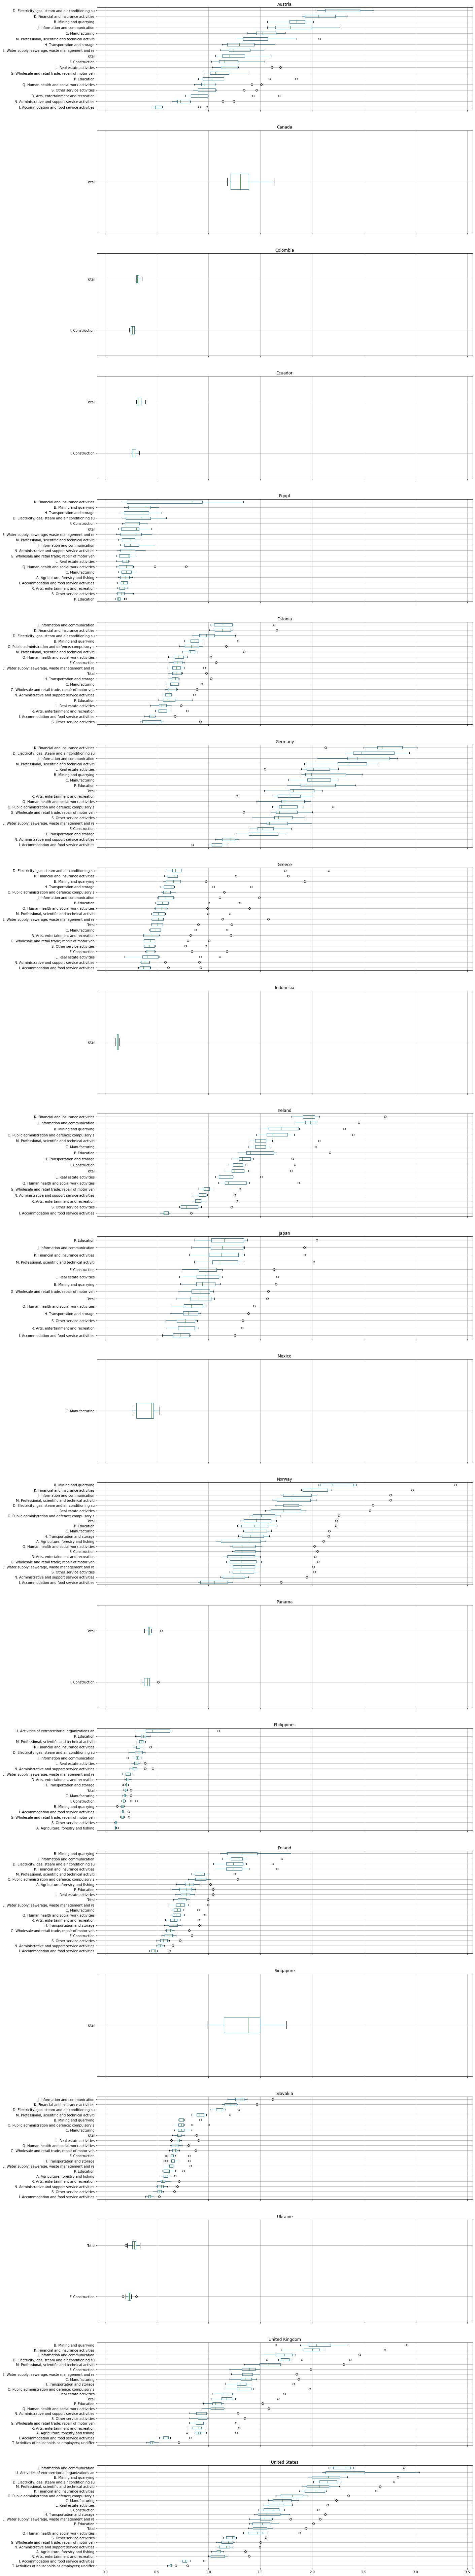

In [10]:
grouped = wealth_factor.groupby(level=0)

nrows = grouped.ngroups

fig, axes = plt.subplots(nrows, figsize=(20,140),sharex=True)

for (key, ax) in zip(grouped.groups.keys(), axes):
    data = grouped.get_group(key).reset_index(level=0,drop=True)
    sort_by_mean = data.median(axis=1).sort_values()
    ax.title.set_text(key)
    data.reindex(sort_by_mean.index, axis=0).T.boxplot(vert=False,ax=ax)

plt.show()

#### All data

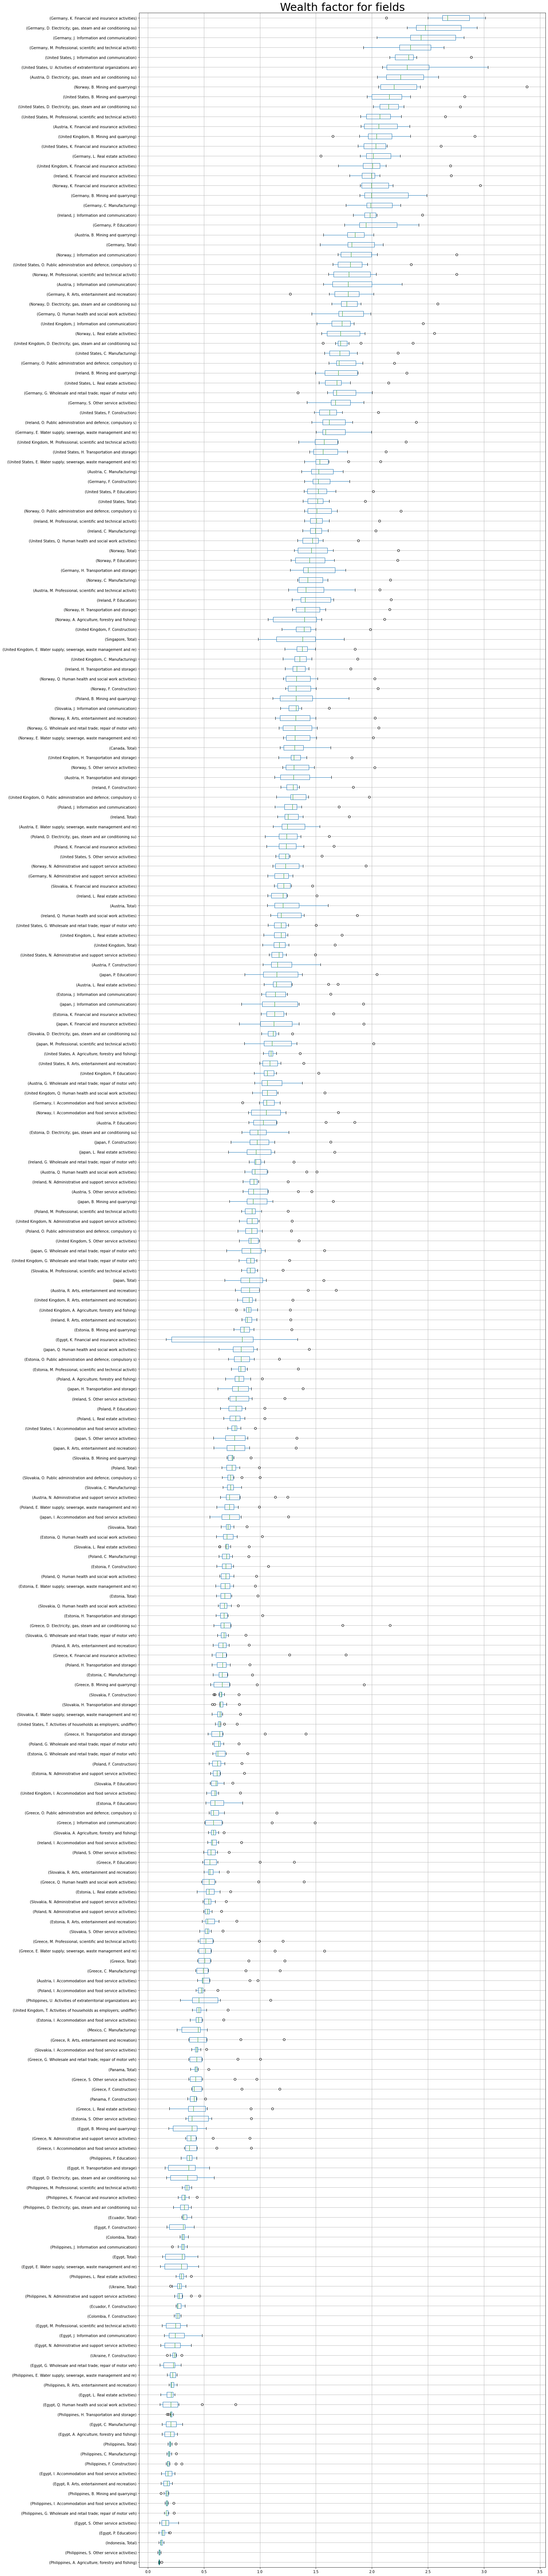

In [11]:
sort_by_mean = wealth_factor.median(axis=1).sort_values()
fig, ax = plt.subplots(figsize=(20,wealth_factor.shape[0]//2))
wealth_factor.reindex(sort_by_mean.index, axis=0).T.boxplot(vert=False,ax=ax)
plt.title("Wealth factor for fields",fontsize=30)
pass